# **TUGAS DATA MINING (DECISION TREE)**

**Nama : Nur El Hasanah**

**NIM : 41101024003**


# **1. Memuat Dataset yang Digunakan**

In [ ]:
import pandas as pd
# Memuat data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/DATA DECISION TREE/drug200.csv')
# Menampilkan 5 baris pertama dari dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Pastikan bahwa dataset yang dipilih mencakup fitur-fitur yang relevan serta varuabel target yang ingin di prediksi.

**A. Fitur yang relevan**

Dataset ini kemungkinan besar mencakup fitur-fitur sebagai berikut:

*   Age: Usia pasien.
*   Sex: Jenis kelamin pasien.
*   BP: Tekanan darah pasien (misalnya: HIGH, LOW, NORMAL).
*   Cholesterol: Kadar kolesterol pasien(misalnya: HIGH, NORMAL).
*   Na_to_K: Rasio natrium terhadap kalium dalam darah pasien.

**B. Variabel target**

Variabel target yang kemungkinan ingin diprediksi adalah Drug yaitu jenis obat yang diresepkan kepada pasien.




# **2. Data Pre-processing dan Data Exploration**

**Data Preprocessing**

**A. Memeriksa missing value**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


**B. Menampilkan informasi data**

Non-null count menunjukkan jumlah nilai yang tidak kosong pada setiap kolom dalam dataset ini.

Tidak ada nilai yang hilang (missing values) dalam dataset ini. Setiap kolom memiliki 200 nilai yang valid dan terisi.
Dataset ini lengkap dan dapat melanjutkan ke tahap analisis data untuk dianalisis.

In [ ]:
# Menampilkan Informasi Data
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


**C. Transformasi variabel kategorik dan normalisasi fitur**

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# TRANSFORMASI VARIABEL KATEGORIK
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah variabel kategorik menjadi numerik dan menyimpan mapping
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
mappings = {}
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# NORMALISASI FITUR
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik (Age dan Na_to_K)
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menampilkan data yang telah ditransformasi
print("\nData yang telah ditransformasi:")
print(df.head())

# MENCETAK KETERANGAN
print("Keterangan Kolom:")
for feature in categorical_features:
    print(f"\n{feature}:")
    for label, value in mappings[feature].items():
        print(f"  {value} : {label}")


Data yang telah ditransformasi:
        Age  Sex  BP  Cholesterol   Na_to_K  Drug
0  0.135593    0   0            0  0.596848     4
1  0.542373    1   1            0  0.213397     2
2  0.542373    1   1            0  0.120239     2
3  0.220339    0   2            0  0.047814     3
4  0.779661    0   1            0  0.368191     4
Keterangan Kolom:

Sex:
  0 : F
  1 : M

BP:
  0 : HIGH
  1 : LOW
  2 : NORMAL

Cholesterol:
  0 : HIGH
  1 : NORMAL

Drug:
  0 : drugA
  1 : drugB
  2 : drugC
  3 : drugX
  4 : drugY


**Exploratory Data Analysis**

**A. Statistik Deskriptif**

Nilai NaN muncul karena fungsi df.describe(include='all') mencoba menghitung statistik deskriptif untuk semua kolom, termasuk yang kategorik dan numerik.

Statistik tertentu hanya relevan untuk tipe data tertentu, dan jika statistik tersebut tidak dapat dihitung untuk tipe data tertentu, maka akan diisi dengan NaN.

In [ ]:
# STATISTIK DESKRIPTIF
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom

Statistik Deskriptif Dataset:
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean     0.496864    0.520000    0.910000     0.485000    0.306945    2.870000
std      0.280412    0.500854    0.821752     0.501029    0.225904    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.271186    0.000000    0.000000     0.000000    0.130605    2.000000
50%      0.508475    1.000000    1.000000     0.000000    0.239774    3.000000
75%      0.728814    1.000000    2.000000     1.000000    0.410001    4.000000
max      1.000000    1.000000    2.000000     1.000000    1.000000    4.000000


Untuk menghilangkan NaN pada statistik deskriptif, maka pisahkan kolom numerik dan kategorik atau statistik deskriptif terpisah, sebagai berikut:


*   Statistik Deskriptif Kolom Numerik: Tabel ini akan berisi statistik yang relevan untuk data numerik (mean, std, min, max, dan lain-lain) tanpa nilai NaN.
*   Statistik Deskriptif Kolom Kategorik: Tabel ini akan berisi statistik yang relevan untuk data kategorikal (count, unique, top, freq) tanpa nilai NaN.



In [ ]:
# PISAHKAN KOLOM NUMERIK DAN KATEGORIK
numerical_features = ['Age', 'Na_to_K']
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

df_numerical = df[numerical_features]
df_categorical = df[categorical_features]

# STATISTIK DESKRIPTIF
print("Statistik Deskriptif Kolom Numerik:")
print(df_numerical.describe())  # Statistik untuk kolom numerik

print("\nStatistik Deskriptif Kolom Kategorik:")
print(df_categorical.describe(include='all'))  # Statistik untuk kolom kategorik

Statistik Deskriptif Kolom Numerik:
              Age     Na_to_K
count  200.000000  200.000000
mean     0.496864    0.306945
std      0.280412    0.225904
min      0.000000    0.000000
25%      0.271186    0.130605
50%      0.508475    0.239774
75%      0.728814    0.410001
max      1.000000    1.000000

Statistik Deskriptif Kolom Kategorik:
              Sex          BP  Cholesterol        Drug
count  200.000000  200.000000   200.000000  200.000000
mean     0.520000    0.910000     0.485000    2.870000
std      0.500854    0.821752     0.501029    1.372047
min      0.000000    0.000000     0.000000    0.000000
25%      0.000000    0.000000     0.000000    2.000000
50%      1.000000    1.000000     0.000000    3.000000
75%      1.000000    2.000000     1.000000    4.000000
max      1.000000    2.000000     1.000000    4.000000


Statistik deskriptif setelah transformasi, khususnya setelah normalisasi fitur numerik dan transformasi variabel kategorik menggunakan LabelEncoder.



*   Interpretasi: Saat menginterpretasikan statistik deskriptif setelah transformasi, penting untuk mengingat transformasi yang telah diterapkan. Misalnya, nilai mean untuk 'Age' setelah normalisasi tidak lagi merepresentasikan usia rata-rata dalam tahun, tetapi merupakan nilai rata-rata dalam skala 0 hingga 1.
*   Konteks: Statistik deskriptif selalu harus diinterpretasikan dalam konteks data dan transformasi yang telah diterapkan.



In [ ]:
# TRANSFORMASI VARIABEL KATEGORIK
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah variabel kategorik menjadi numerik dan menyimpan mapping
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
mappings = {}
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# NORMALISASI FITUR
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik (Age dan Na_to_K)
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# STATISTIK DESKRIPTIF SETELAH TRANSFORMASI
print("Statistik Deskriptif Setelah Transformasi:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom


Statistik Deskriptif Setelah Transformasi:
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean     0.496864    0.520000    0.910000     0.485000    0.306945    2.870000
std      0.280412    0.500854    0.821752     0.501029    0.225904    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.271186    0.000000    0.000000     0.000000    0.130605    2.000000
50%      0.508475    1.000000    1.000000     0.000000    0.239774    3.000000
75%      0.728814    1.000000    2.000000     1.000000    0.410001    4.000000
max      1.000000    1.000000    2.000000     1.000000    1.000000    4.000000


In [ ]:
# ... (Kode transformasi dan normalisasi dari langkah sebelumnya) ...
# MEMBUAT TABEL KONTINGENSI SEBELUM TRANSFORMASI
df_original = pd.read_csv('/content/drive/MyDrive/DATA DECISION TREE/drug200.csv')
drug_counts_original = pd.crosstab(df_original['BP'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Sex'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Cholesterol'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)


# MEMBUAT TABEL KONTINGENSI SETELAH TRANSFORMASI
drug_counts_transformed = pd.crosstab(df['BP'], df['Drug'])
print("\nHubungan antara BP dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Sex'], df['Drug'])
print("\nHubungan antara Sex dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Cholesterol'], df['Drug'])
print("\nHubungan antara Cholesterol dan Drug (setelah transformasi):")
print(drug_counts_transformed)

# Hubungan antara variabel kategorik dan variabel target (menggunakan crosstab)
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(f"\nHubungan antara {feature} dan Drug:")
    print(drug_counts)



Hubungan antara BP dan Drug (sebelum transformasi):
Drug    drugA  drugB  drugC  drugX  drugY
BP                                       
HIGH       23     16      0      0     38
LOW         0      0     16     18     30
NORMAL      0      0      0     36     23

Hubungan antara BP dan Drug (sebelum transformasi):
Drug  drugA  drugB  drugC  drugX  drugY
Sex                                    
F         9      6      7     27     47
M        14     10      9     27     44

Hubungan antara BP dan Drug (sebelum transformasi):
Drug         drugA  drugB  drugC  drugX  drugY
Cholesterol                                   
HIGH            12      8     16     20     47
NORMAL          11      8      0     34     44

Hubungan antara BP dan Drug (setelah transformasi):
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Sex dan Drug (setelah transformasi):
Drug   0   1  2   3   4
Sex                    
0  

**B. Visualisasi Distribusi Data dengan Histogram dan Boxplot**

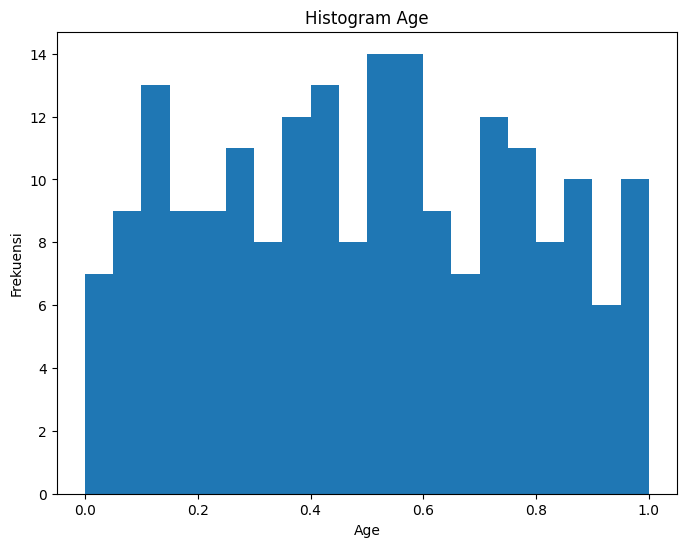

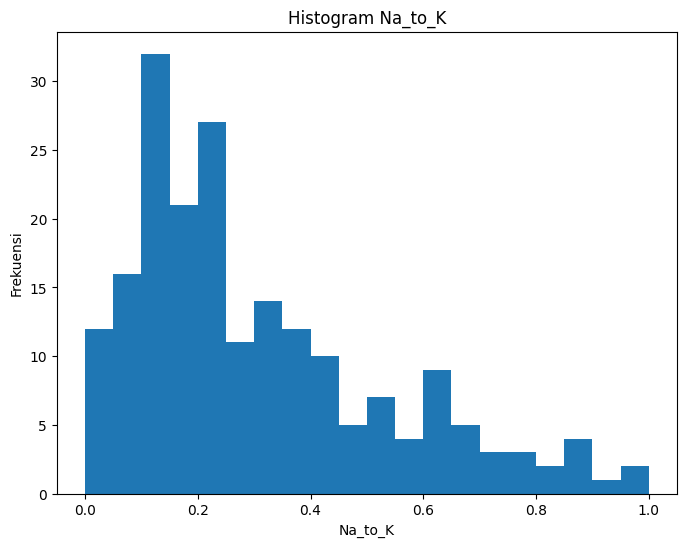

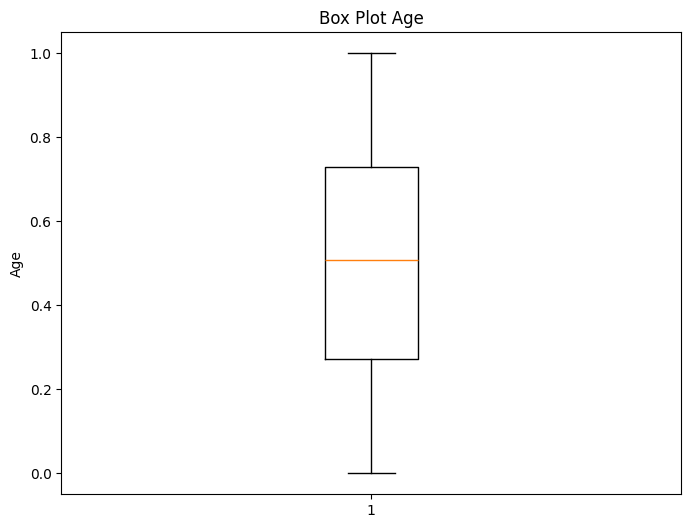

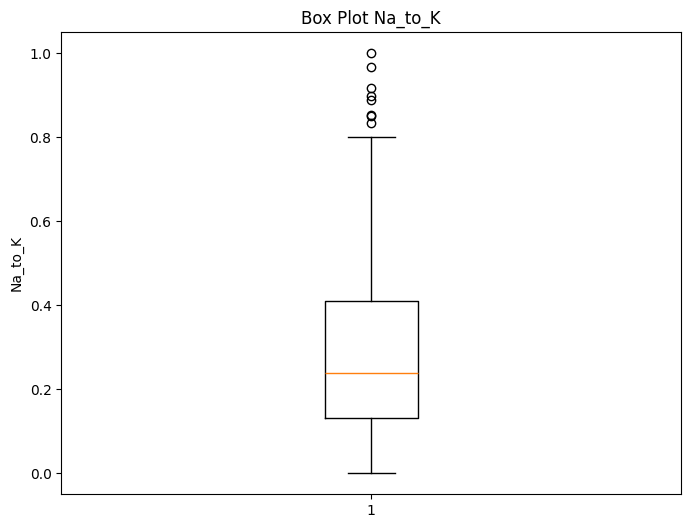

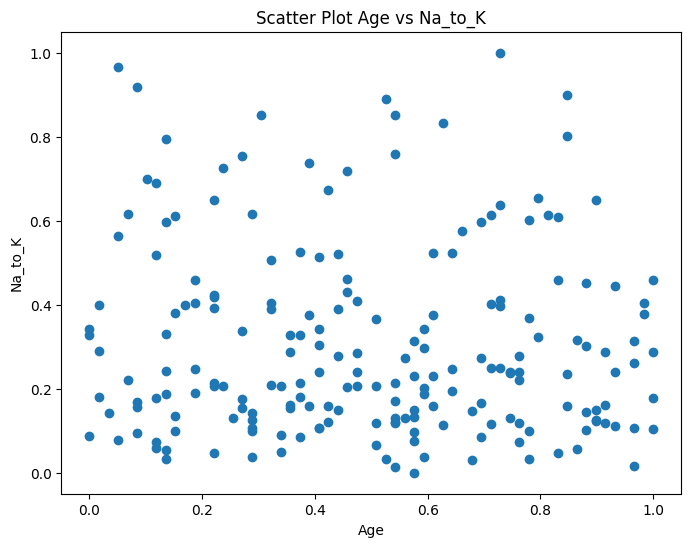

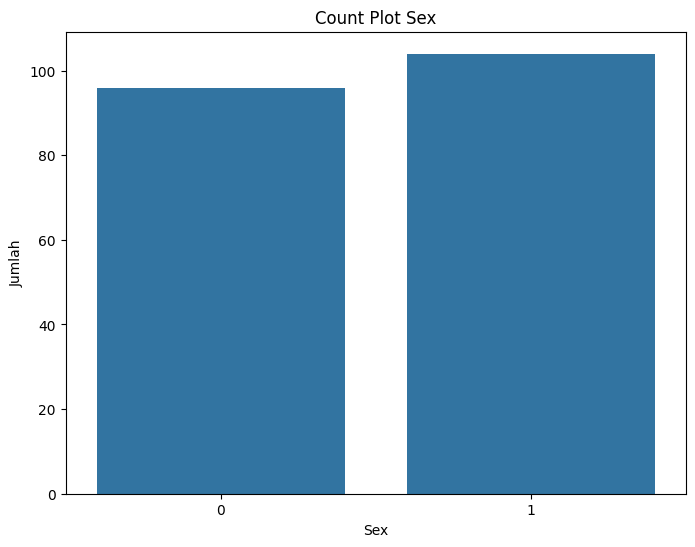

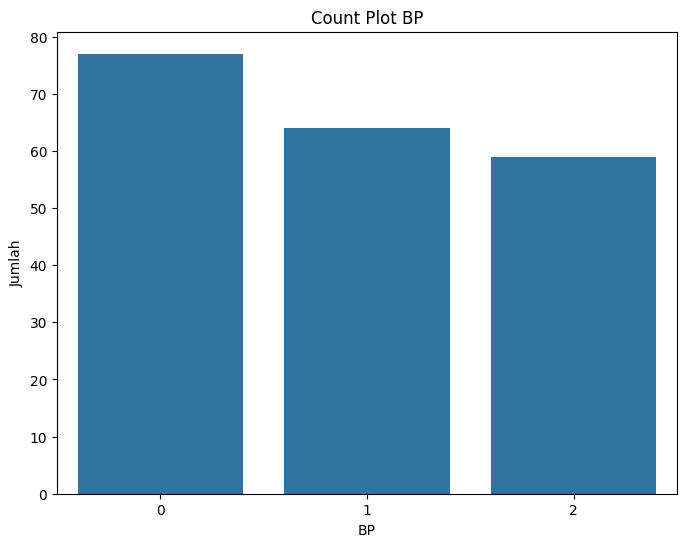

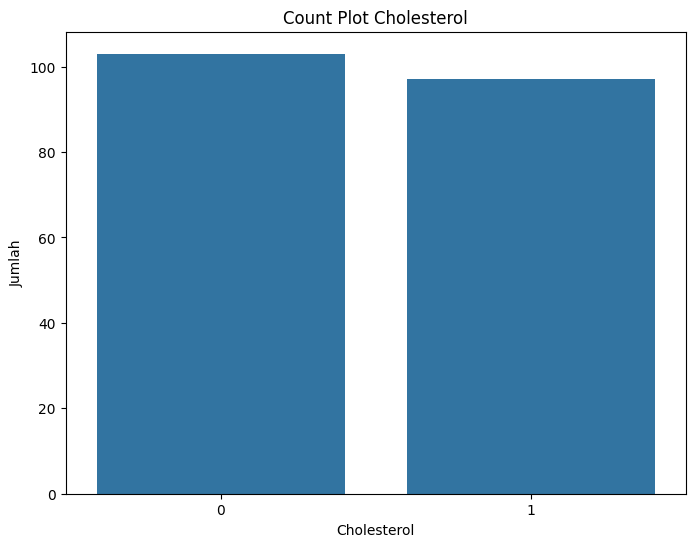

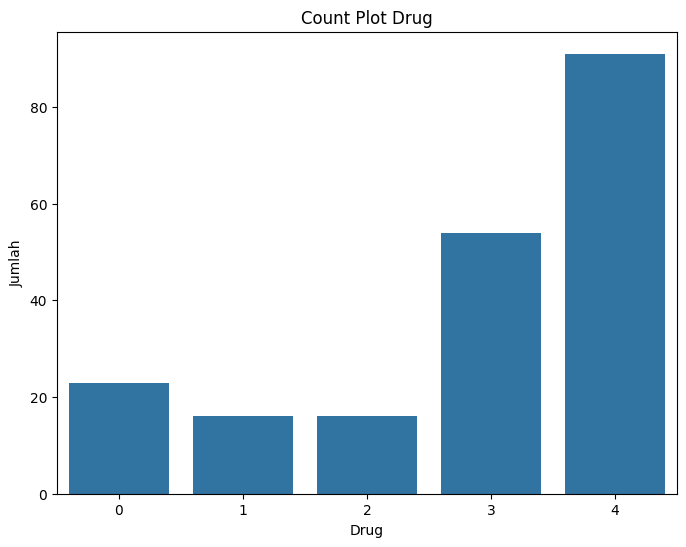

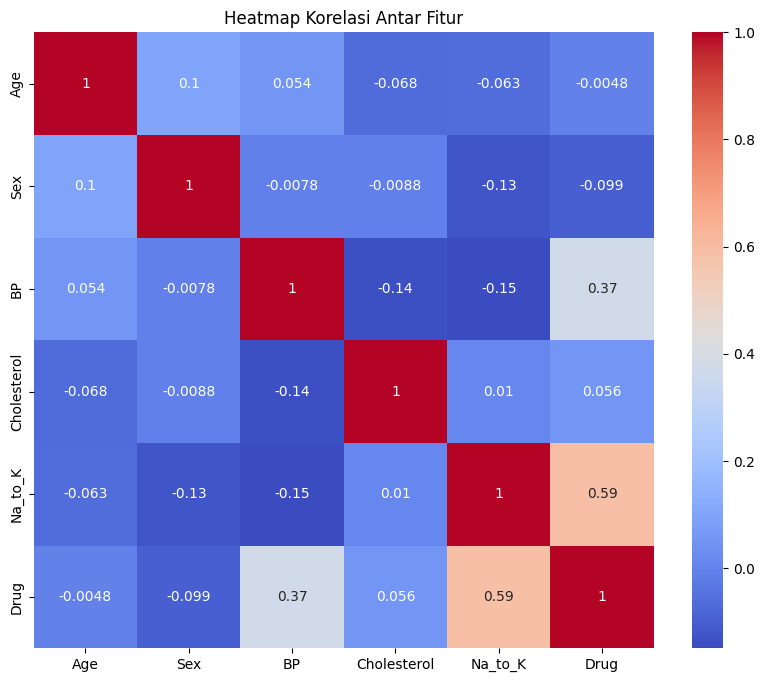

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# VISUALISASI DATA

# 1. Histogram untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

# 2. Box Plot untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Box Plot {feature}')
    plt.ylabel(feature)
    plt.show()

# 3. Scatter Plot untuk Hubungan Antar Fitur Numerik
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Na_to_K'])
plt.title('Scatter Plot Age vs Na_to_K')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

# 4. Count Plot untuk Fitur Kategorik
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Count Plot {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.show()

# 5. Heatmap untuk Korelasi Antar Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

**C. Exploratory Data Analysis (EDA) lebih lanjut**



*   Hubungan paling signifikan dalam dataset adalah antara rasio natrium terhadap kalium dalam darah (Na_to_K) dan jenis obat yang diresepkan (Drug).
*   Usia pasien (Age) tidak memiliki pengaruh yang signifikan terhadap jenis obat yang diresepkan atau rasio Na_to_K.
*   Rasio Na_to_K dan usia pasien memiliki korelasi negatif yang sangat lemah, yang menunjukkan bahwa tidak ada hubungan linear yang berarti antara kedua variabel tersebut





*   Nilai 0 dalam tabel hubungan antara fitur kategorik dan variabel target menunjukkan bahwa kombinasi nilai tertentu tidak ada dalam dataset.
*   Nilai 0 pada tabel kontingensi setelah transformasi tidak selalu berarti tidak ada hubungan antara nilai-nilai kategorikal asli karena menggunakan transformasi yang telah diterapkan dan menggunakan mapping Label Encoder untuk menginterpretasikan hasil dengan benar.



Fitur: Age
Jumlah outlier: 0
Persentase outlier: 0.00%
Outlier tidak signifikan, tidak perlu ditangani.

Fitur: Na_to_K
Jumlah outlier: 8
Persentase outlier: 4.00%
Outlier tidak signifikan, tidak perlu ditangani.


Korelasi antara variabel numerik dan target:
              Age   Na_to_K      Drug
Age      1.000000 -0.063119 -0.004828
Na_to_K -0.063119  1.000000  0.589120
Drug    -0.004828  0.589120  1.000000


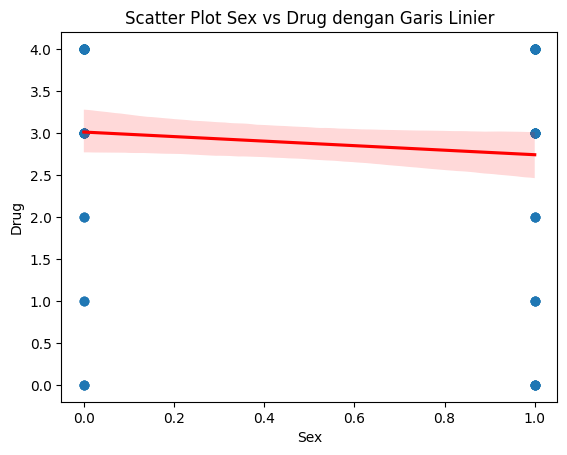

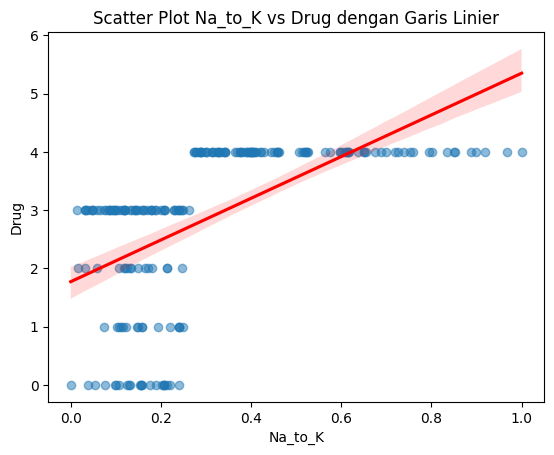


Hubungan antara Sex dan Drug:
Drug   0   1  2   3   4
Sex                    
0      9   6  7  27  47
1     14  10  9  27  44

Hubungan antara BP dan Drug:
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Cholesterol dan Drug:
Drug          0  1   2   3   4
Cholesterol                   
0            12  8  16  20  47
1            11  8   0  34  44


In [ ]:
#1. Mencari Outlier
#a. Mencari Outlier (menggunakan IQR)
def find_outliers_IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

for feature in numerical_features:
    outliers = find_outliers_IQR(df, feature)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    print(f"Fitur: {feature}")
    print(f"Jumlah outlier: {num_outliers}")
    print(f"Persentase outlier: {percentage_outliers:.2f}%")

# b. Menentukan apakah outlier signifikan
    if percentage_outliers > 5:  # Jika persentase outlier > 5%, dianggap signifikan
        print("Outlier signifikan, perlu ditangani.\n")
    else:
        print("Outlier tidak signifikan, tidak perlu ditangani.\n")

# 2. Mencari Pola dan Hubungan Antar Variabel
# a. Korelasi antar variabel numerik
correlation_matrix = df[['Age', 'Na_to_K', 'Drug']].corr()
print("\nKorelasi antara variabel numerik dan target:")
print(correlation_matrix)

# Scatter Plot
sns.regplot(x='Sex', y='Drug', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot Sex vs Drug dengan Garis Linier')
plt.xlabel('Sex')
plt.ylabel('Drug')
plt.show()

sns.regplot(x='Na_to_K', y='Drug', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot Na_to_K vs Drug dengan Garis Linier')
plt.xlabel('Na_to_K')
plt.ylabel('Drug')
plt.show()

# b. Hubungan antara variabel kategorik dan variabel target (menggunakan crosstab)
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(f"\nHubungan antara {feature} dan Drug:")
    print(drug_counts)

# **3. Pembuatan Model Decision Tree**



*   Implementasikan model Decision Tree menggunakan alat atau pustaka yang tersedia, seperti scikit-learn.
*   Pilih fitur yang akan digunakan untuk membagi data pada setiap node.
*   Pastikan model dibangun dengan benar dan sesuai dengan dataset yang dipilih.


Parameter criterion = 'gini' memberi tahu Decision Tree untuk menggunakan Gini impurity sebagai ukuran untuk memilih fitur terbaik dan titik pemisah untuk membagi data pada setiap node. Tujuannya adalah untuk membangun pohon yang meminimalkan impurity dan menghasilkan klasifikasi yang akurat.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Impor OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# PEMBUATAN MODEL DECISION TREE
# Pembuatan Model dan Pencarian Hyperparameter Terbaik

# a. Bagi data menjadi set pelatihan dan pengujian
# Use the processed X instead of redefining it
X = df[['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol']].copy()  # Create a copy to avoid modifying the original
y = df['Drug']

# One-hot encode categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol']
for feature in categorical_features:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output
    encoded_feature = encoder.fit_transform(X[[feature]])
    encoded_df = pd.DataFrame(encoded_feature, columns=[f"{feature}_{cat}" for cat in encoder.categories_[0]])
    X = X.drop(columns=[feature]).join(encoded_df)  # Replace original feature with encoded columns

# Split data after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Tentukan hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 3, 5]  # Experiment with different values
}

# c. Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# d. Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
grid_search.fit(X_train, y_train)

# e. Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# f. Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# g. Membangun Model
# Instead, use the encoded X from above:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Hyperparameter terbaik: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(random_state=42)

# **4. Evaluasi Model dan Visualisasi Decision Tree dengan Semua Sub-tree**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



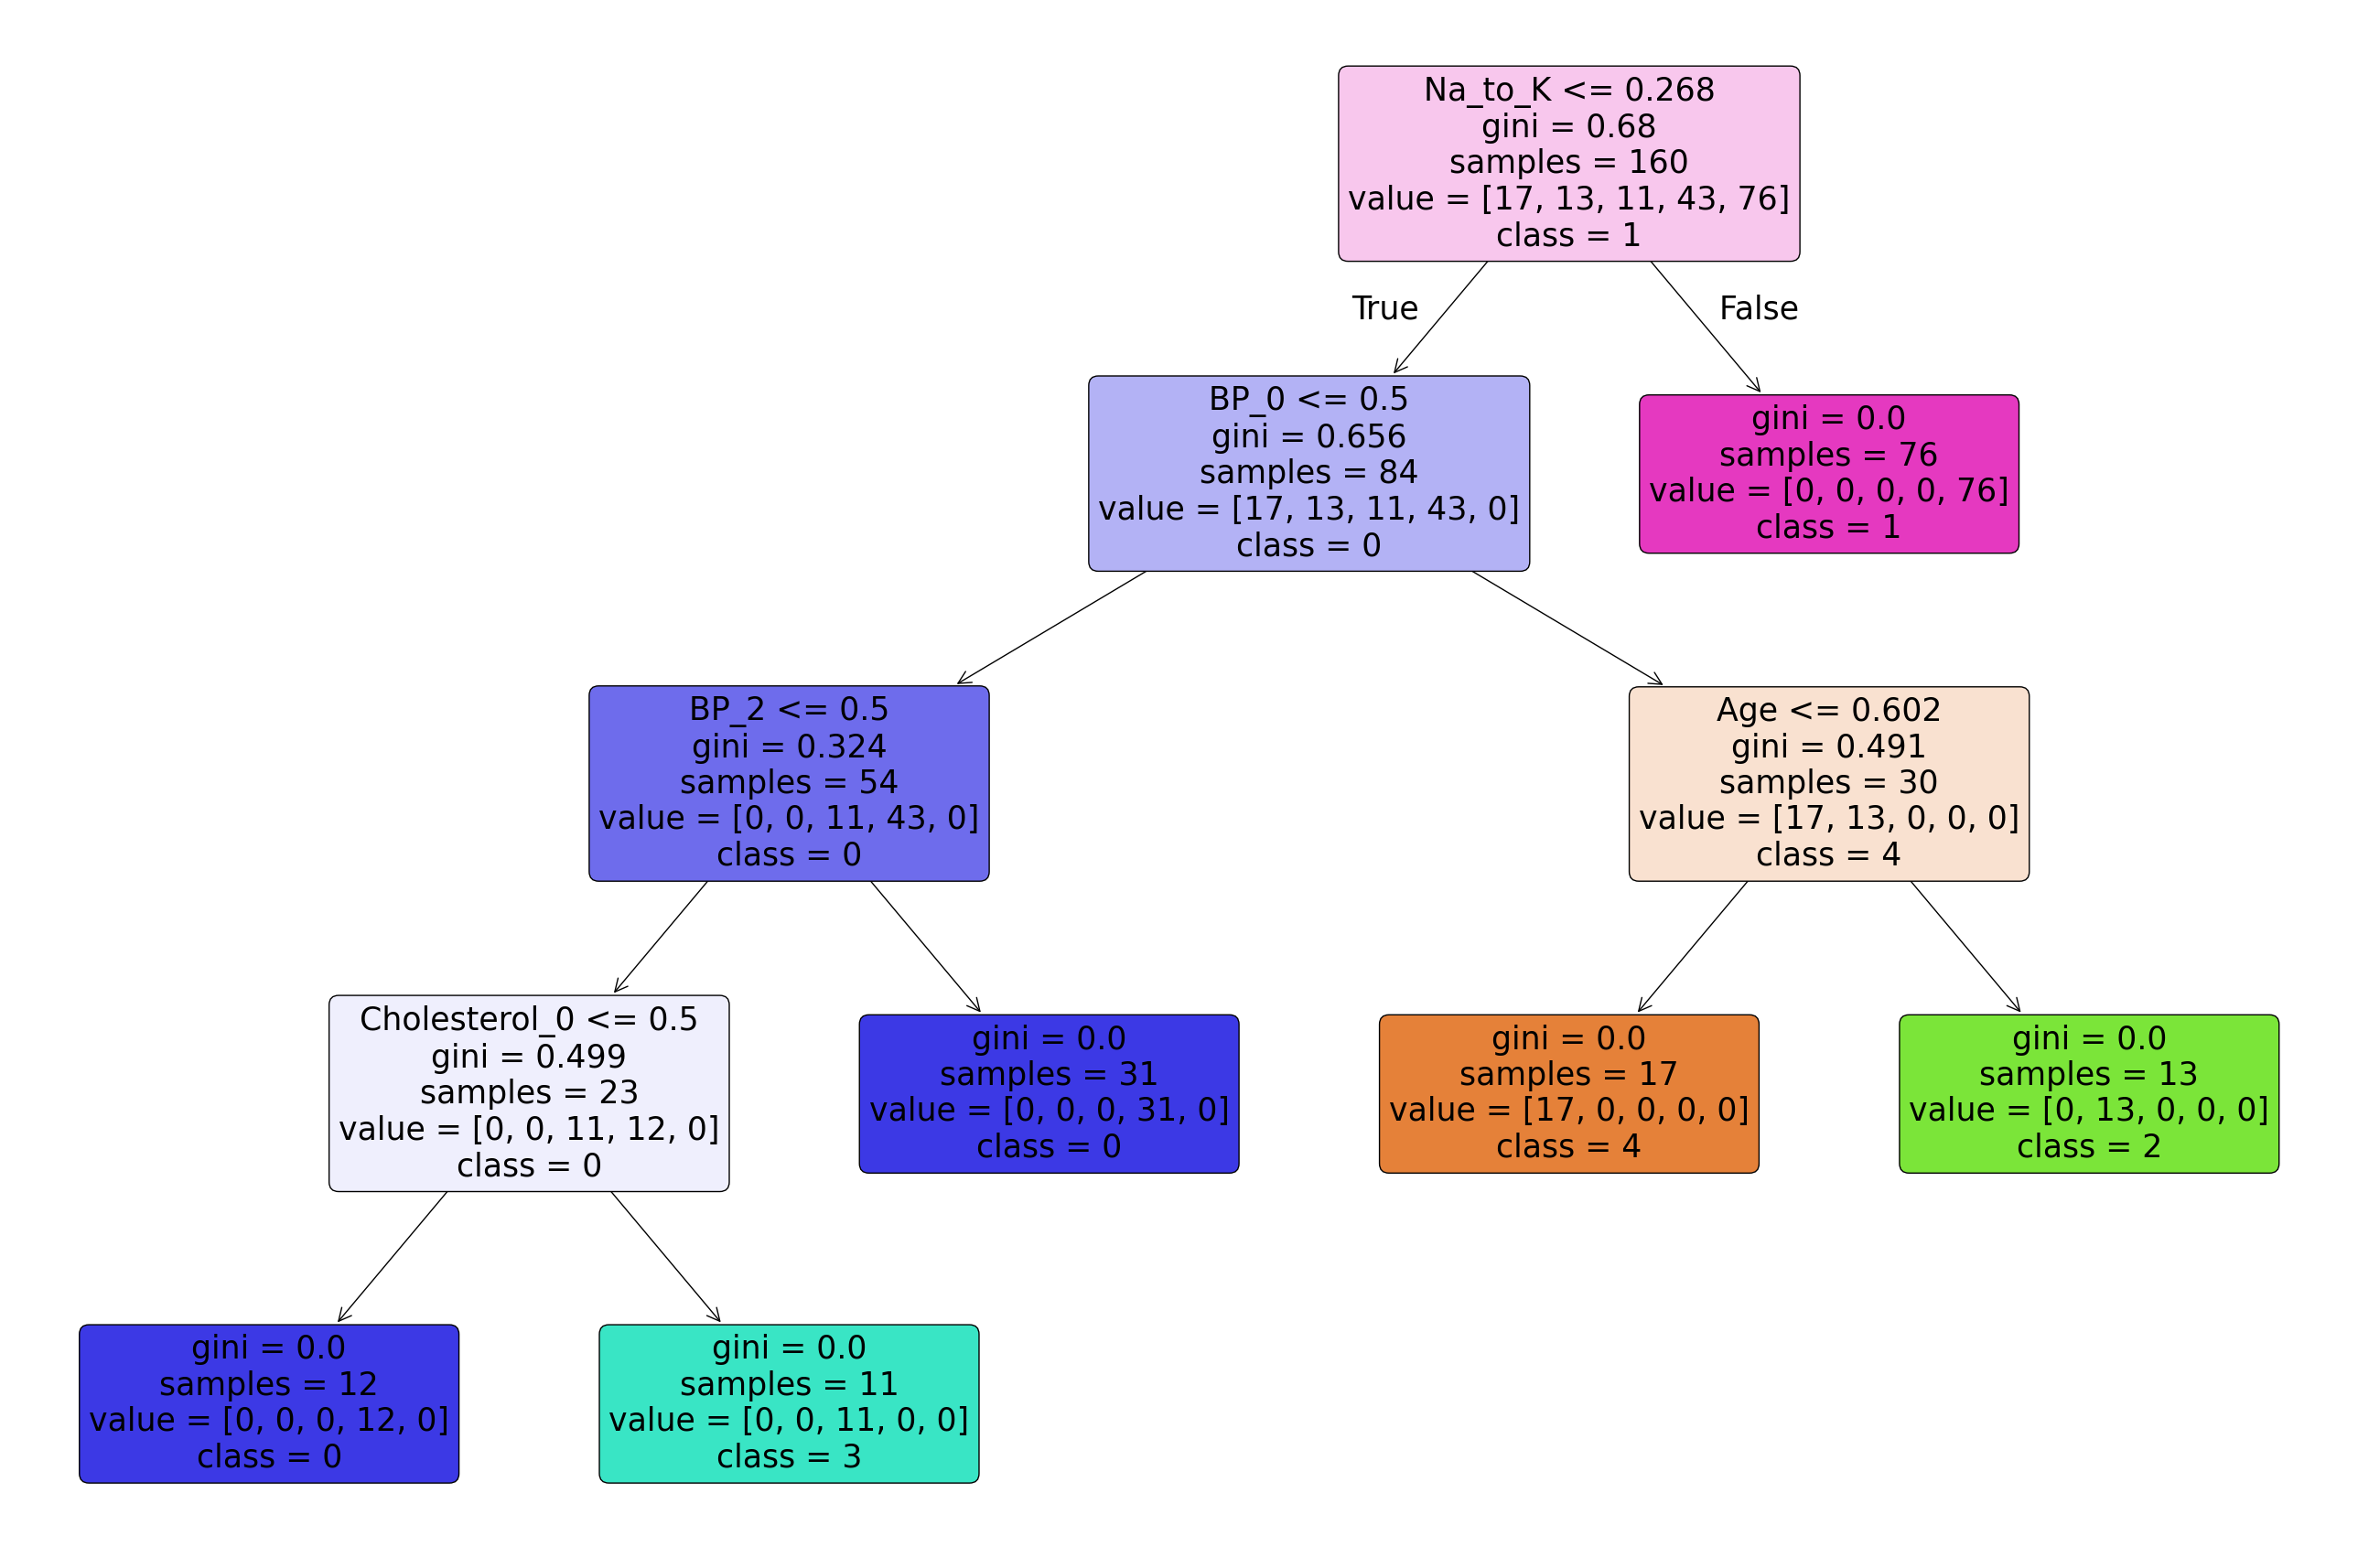

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score # Impor precision_score dan recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# a. Evaluasi Model
# Predict using the trained model
y_pred = model.predict(X_test)  # This line is added to get predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Ganti average sesuai kebutuhan
recall = recall_score(y_test, y_pred, average='weighted')  # Ganti average sesuai kebutuhan
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(classification_report(y_test, y_pred))

# b. Visualisasi Decision Tree dengan Semua Sub-tree
plt.figure(figsize=(33, 22))# Ukuran figur yang sangat besar

# c. Use X_train.columns for feature_names after one-hot encoding
plot_tree(model,
          feature_names=X_train.columns,  # Changed to X.columns
          class_names=df['Drug'].unique().astype(str),
          filled=True,
          rounded=True,
          fontsize=25, # Ukuran font diperbesar
          max_depth=5 # Menampilkan semua level pohon hingga kedalaman 9
          # Parameter min_samples_split dan min_samples_leaf dihapus
          # karena tidak berlaku untuk plot_tree.
          # Parameter-parameter ini hanya digunakan saat membangun model (DecisionTreeClassifier).
          )
plt.savefig('decision_tree.png', bbox_inches='tight') # Menyimpan figur sebagai PNG dengan bbox_inches='tight'
plt.show()

**Output yang dihasilkan adalah sebagai berikut**

Model mencapai performa sempurna di semua matriks evaluasi. Dalam kasus ini, untuk semua kelas (0, 1, 2, 3, 4), model mencapai precision, recall, dan f1-score 1.0. Ini menunjukkan klasifikasi yang sempurna tanpa kesalahan positif maupun negatif. Model menunjukkan akurasi 100% pada data uji

> - Accuracy: 1.0: Ini berarti model memprediksi dengan benar 100% dari data di set pengujian.
> - Precision: 1.0: Ini berarti untuk setiap kelas, semua prediksi positif yang dibuat oleh model adalah benar. Tidak ada false positive.
> - Recall: 1.0: Ini berarti untuk setiap kelas, model berhasil mengidentifikasi semua instance yang sebenarnya positif. Tidak ada false negative.
> - F1-score: 1.0: Ini adalah rata-rata harmonik dari precision dan recall, yang juga sempurna dalam kasus ini.



> Walaupun mendapatkan nilai sempurna untuk semua matriks pada set pengujian sangat tidak biasa. Hal ini sering kali menunjukkan adanya overfitting, di mana model telah menghafal data training dengan sangat baik sehingga dapat memprediksi data training dengan sempurna, tetapi mungkin tidak dapat digeneralisasi dengan baik ke data baru yang belum pernah dilihat sebelumnya.


**Interpretasi Decision Tree**

Secara keseluruhan, pohon keputusan ini berhasil membagi data ke dalam beberapa node daun, sebagian besar dengan nilai Gini yang rendah (0.0), yang menunjukkan bahwa model mampu mengklasifikasikan sebagian besar data dengan baik. Model ini menggunakan fitur-fitur seperti Na_to_K, BP_0, BP_2, Cholesterol_0, dan Age untuk mengambil keputusan di setiap tingkatan.

Pohon keputusan ini menunjukkan cara kerja Decision Tree dalam mengklasifikasikan data berdasarkan fitur tertentu:

1. **Node Akar** (berwarna merah muda, fitur Na_to_K):
   - Pada node ini, data dipisahkan berdasarkan nilai Na_to_K. Jika Na_to_K ≤ 0.268, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
   - **Fitur**: Na_to_K, **Threshold**: Na_to_K ≤ 0.268, **Gini Impurity**: 0.68 (menunjukkan adanya keragaman kelas di awal), **Jumlah Sampel**: 160, **Distribusi Kelas**: [17, 13, 11, 43, 76], **Prediksi Kelas**: 1 (kelas dengan sampel terbanyak di node ini).

2. **Cabang Kanan Na_to_K > 0.268**:
   - **Node 1** (berwarna ungu):
     Semua sampel di node ini merupakan kelas drugB, sehingga tidak ada pembagian lebih lanjut.
     - **Gini Impurity**: 0.0, **Jumlah Sampel**: 76, **Distribusi Kelas**: [0, 0, 0, 0, 76], **Prediksi Kelas**: drugB.

3. **Cabang Kiri Na_to_K ≤ 0.268**:
   - **Node 2** (berwarna biru muda):
     Node ini memisahkan data berdasarkan BP_0. Jika BP_0 ≤ 0.5, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
     - **Fitur**: BP_0, **Threshold**: BP_0 ≤ 0.5, **Gini Impurity**: 0.656, **Jumlah Sampel**: 84, **Distribusi Kelas**: [17, 13, 11, 43, 0], **Prediksi Kelas**: drugA.

4. **Cabang Kiri dari Node 2 (BP_0 ≤ 0.5)**:
   - **Node 3** (berwarna biru tua):
     Data dipisahkan berdasarkan BP_2. Jika BP_2 ≤ 0.5, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
     - **Fitur**: BP_2, **Threshold**: BP_2 ≤ 0.5, **Gini Impurity**: 0.324, **Jumlah Sampel**: 54, **Distribusi Kelas**: [0, 0, 11, 43, 0], **Prediksi Kelas**: drugA.

5. **Cabang Kiri dari Node 3 (BP_2 ≤ 0.5)**:
   - **Node 4** (berwarna putih):
     Data dipisahkan lagi berdasarkan Cholesterol_0. Jika Cholesterol_0 ≤ 0.5, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
     - **Fitur**: Cholesterol_0, **Threshold**: Cholesterol_0 ≤ 0.5, **Gini Impurity**: 0.499, **Jumlah Sampel**: 23, **Distribusi Kelas**: [0, 0, 11, 12, 0], **Prediksi Kelas**: drugA.

6. **Cabang Kiri dari Node 4 (Cholesterol_0 ≤ 0.5)**:
   - **Node 5** (berwarna biru tua):
     Semua sampel di node ini termasuk kelas drugA.
     - **Gini Impurity**: 0.0, **Jumlah Sampel**: 12, **Distribusi Kelas**: [0, 0, 0, 12, 0], **Prediksi Kelas**: drugA.

7. **Cabang Kanan dari Node 4 (Cholesterol_0 > 0.5)**:
   - **Node 6** (berwarna hijau tosca):
     Semua sampel di sini termasuk kelas drugX.
     - **Gini Impurity**: 0.0, **Jumlah Sampel**: 11, **Distribusi Kelas**: [0, 0, 11, 0, 0], **Prediksi Kelas**: drugX.

8. **Cabang Kanan dari Node 3 (BP_2 > 0.5)**:
   - Semua sampel dalam node ini adalah kelas drugA.
     - **Gini Impurity**: 0.0, **Jumlah Sampel**: 31, **Distribusi Kelas**: [0, 0, 0, 31, 0], **Prediksi Kelas**: drugA.

9. **Cabang Kanan dari Node 2 (BP_0 > 0.5)**:
   - **Node 7** (berwarna krem):
     Data dipisahkan berdasarkan Age. Jika Age ≤ 0.602, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
     - **Fitur**: Age, **Threshold**: Age ≤ 0.602, **Gini Impurity**: 0.491, **Jumlah Sampel**: 30, **Distribusi Kelas**: [17, 13, 0, 0, 0], **Prediksi Kelas**: drugY.

10. **Cabang Kiri dari Node 7 (Age ≤ 0.602)**:
    - **Node 8** (berwarna oranye):
      Semua sampel dalam node ini adalah kelas drugY.
      - **Gini Impurity**: 0.0, **Jumlah Sampel**: 17, **Distribusi Kelas**: [17, 0, 0, 0, 0], **Prediksi Kelas**: drugY.

11. **Cabang Kanan dari Node 7 (Age > 0.602)**:
    - **Node 9** (berwarna hijau):
      Semua sampel dalam node ini adalah kelas drugC.
      - **Gini Impurity**: 0.0, **Jumlah Sampel**: 13, **Distribusi Kelas**: [0, 13, 0, 0, 0], **Prediksi Kelas**: drugC.

**Analisis dan Potensi Masalah**

Meskipun hasil evaluasi model sempurna, ada beberapa hal yang perlu dipertimbangkan, sebagai berikut:

*   Overfitting: Accuracy 1.0 pada data testing bisa menjadi indikasi overfitting, terutama jika dataset kecil atau model sangat kompleks. Overfitting berarti bahwa model telah "menghafal" data pelatihan dan tidak dapat digeneralisasi dengan baik ke data baru.
*   Data Testing yang Tidak Representatif: Jika data testing tidak representatif terhadap data dunia nyata, hasil evaluasi mungkin tidak mencerminkan kinerja model di lingkungan yang sebenarnya.
*   Kebetulan: Meskipun kecil kemungkinannya, akurasi 1.0 bisa juga terjadi karena kebetulan, terutama jika dataset sangat kecil.



*   Tujuan cross-validation adalah untuk mengevaluasi kinerja model pada berbagai subset data untuk mendapatkan estimasi kinerja yang lebih andal dan mencegah overfitting. Cross-validation membagi data menjadi beberapa fold (lipatan) dan melatih model pada subset data yang berbeda untuk setiap fold. Hasil dari setiap fold kemudian digabungkan untuk mendapatkan estimasi kinerja keseluruhan.
*   Pruning juga dilakukan pada data yang sama. Pruning adalah teknik untuk menyederhanakan decision tree dengan menghapus node atau cabang yang tidak penting. Ini membantu mencegah overfitting dengan mengurangi kompleksitas model.





*   Cross-Validation: Cross-validation akan memberikan estimasi kinerja yang lebih andal dibandingkan dengan hanya membagi data menjadi training dan testing set satu kali. Ini karena cross-validation mengevaluasi model pada berbagai subset data.
*   Pruning: Pruning dapat membantu mencegah overfitting dengan menyederhanakan decision tree. Kita dapat menggunakan teknik cost complexity pruning atau minimal cost complexity pruning untuk menemukan tingkat pruning yang optimal.
*   Keterbatasan: Meskipun cross-validation dan pruning dapat membantu, perlu diingat bahwa jika dataset kecil, model mungkin tetap memiliki keterbatasan dalam hal generalization ke data baru yang sangat berbeda.



Cross-Validation Scores: [1.    1.    0.975 0.925 1.   ]
Mean Accuracy: 0.9800000000000001
Accuracy on Testing Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



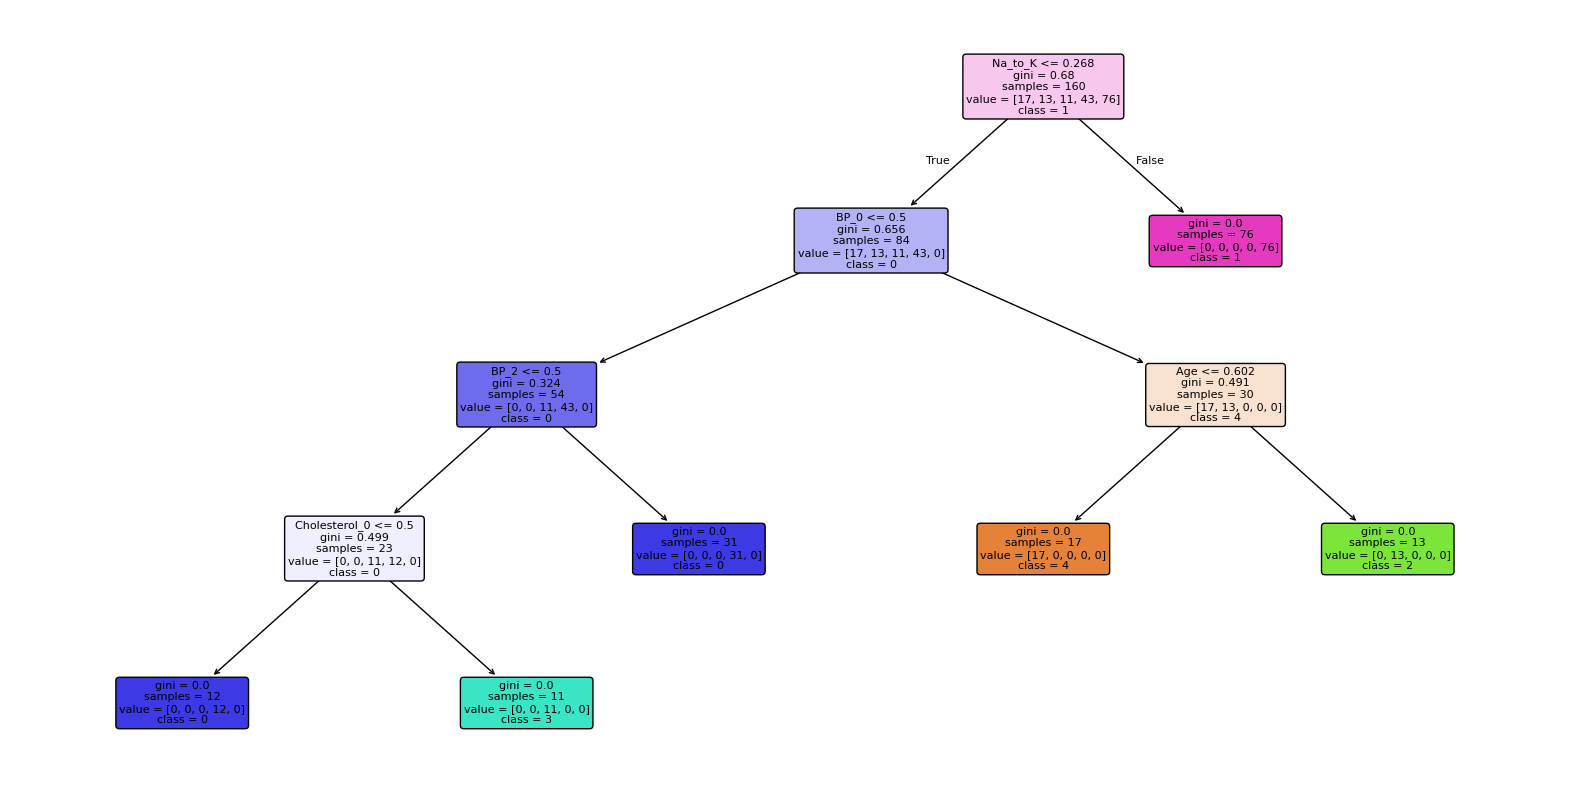

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Pra-pemrosesan data (One-Hot Encoding)
# (kode One-Hot Encoding seperti di contoh sebelumnya)

# 2. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Tentukan model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# 4. Terapkan Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

# 5. Pruning dengan GridSearchCV
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}  # Rentang nilai ccp_alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 6. Latih model terbaik
best_model.fit(X_train, y_train)

# 7. Evaluasi model pada data testing
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy}")
print(classification_report(y_test, y_pred))

# 8. Visualisasikan Decision Tree (opsional)
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=df['Drug'].unique().astype(str),
          fontsize=8)
plt.show()

Setelah mengevaluasi model dan menerapkan Cross-Validation, diperoleh hasil sebagai berikut:
- **Skor Cross-Validation**: [1.0, 1.0, 0.975, 0.925, 1.0]
- **Rata-rata Akurasi**: 0.98
- **Akurasi pada Data Pengujian**: 1.0

Visualisasi pohon keputusan tetap menunjukkan struktur yang serupa dengan sebelumnya, mengindikasikan bahwa model masih mengalami overfitting.